# Multi-view Spherical KMeans

Note, this tutorial compares performance against the SphericalKMeans function from the spherecluster package which is not a installed dependency of mvlearn.

In [1]:
!pip3 install spherecluster==0.1.7

from mvlearn.datasets import load_UCImultifeature
from mvlearn.cluster import MultiviewSphericalKMeans
from spherecluster import SphericalKMeans
import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics import normalized_mutual_info_score as nmi_score
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') # Ignore warnings
%matplotlib inline

You should consider upgrading via the 'pip install --upgrade pip' command.


/home/alex/MLenv/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


##### Load in UCI digits multiple feature dataset as an example

In [2]:
RANDOM_SEED=5

# Load dataset along with labels for digits 0 through 4
n_class = 5
data, labels = load_UCImultifeature(select_labeled = list(range(n_class)))

# Just get the first two views of data
m_data = data[:2]

##### Creating a function to display data and the results of clustering

In [3]:
def display_plots(pre_title, data, labels):
    
    # plot the views
    plt.figure()
    fig, ax = plt.subplots(1,2, figsize=(14,5))
    dot_size=10
    ax[0].scatter(data[0][:, 0], data[0][:, 1],c=labels,s=dot_size)
    ax[0].set_title(pre_title + ' View 1')
    ax[0].axes.get_xaxis().set_visible(False)
    ax[0].axes.get_yaxis().set_visible(False)

    ax[1].scatter(data[1][:, 0], data[1][:, 1],c=labels,s=dot_size)
    ax[1].set_title(pre_title + ' View 2')
    ax[1].axes.get_xaxis().set_visible(False)
    ax[1].axes.get_yaxis().set_visible(False)

    plt.show()

## Multi-view spherical KMeans clustering on 2 views

Here we will compare the performance of the Multi-view and Single-view versions of spherical kmeans clustering. We will evaluate the purity of the resulting clusters from each algorithm with respect to the class labels using the normalized mutual information metric. <br>

As we can see, Multi-view clustering produces clusters with slightly higher purity compared to those produced by clustering on just a single view or by clustering the two views concatenated together.

In [4]:
#################Single-view spherical kmeans clustering#####################
# Cluster each view separately
s_kmeans = SphericalKMeans(n_clusters=n_class, random_state=RANDOM_SEED)
s_clusters_v1 = s_kmeans.fit_predict(m_data[0])
s_clusters_v2 = s_kmeans.fit_predict(m_data[1])

# Concatenate the multiple views into a single view
s_data = np.hstack(m_data)
s_clusters = s_kmeans.fit_predict(s_data)

# Compute nmi between true class labels and single-view cluster labels
s_nmi_v1 = nmi_score(labels, s_clusters_v1)
s_nmi_v2 = nmi_score(labels, s_clusters_v2)
s_nmi = nmi_score(labels, s_clusters)
print('Single-view View 1 NMI Score: {0:.3f}\n'.format(s_nmi_v1))
print('Single-view View 2 NMI Score: {0:.3f}\n'.format(s_nmi_v2))
print('Single-view Concatenated NMI Score: {0:.3f}\n'.format(s_nmi))

#################Multi-view spherical kmeans clustering######################

# Use the MultiviewSphericalKMeans instance to cluster the data
m_kmeans = MultiviewSphericalKMeans(n_clusters=n_class, random_state=RANDOM_SEED)
m_clusters = m_kmeans.fit_predict(m_data)

# Compute nmi between true class labels and multi-view cluster labels
m_nmi = nmi_score(labels, m_clusters)
print('Multi-view NMI Score: {0:.3f}\n'.format(m_nmi))

Single-view View 1 NMI Score: 0.631

Single-view View 2 NMI Score: 0.730

Single-view Concatenated NMI Score: 0.730

Multi-view NMI Score: 0.823



##### Plots of clusters produced by multi-view spectral clustering and the true clusters
We will display the clustering results of the Multi-view kmeans clustering algorithm below, along with the true class labels.

In [5]:
# Running TSNE to display clustering results via low dimensional embedding
tsne = TSNE()
new_data_1 = tsne.fit_transform(m_data[0])
new_data_2 = tsne.fit_transform(m_data[1])
new_data = [new_data_1, new_data_2]

<Figure size 432x288 with 0 Axes>

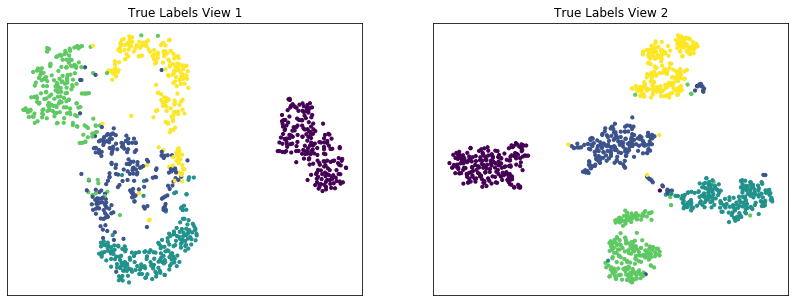

<Figure size 432x288 with 0 Axes>

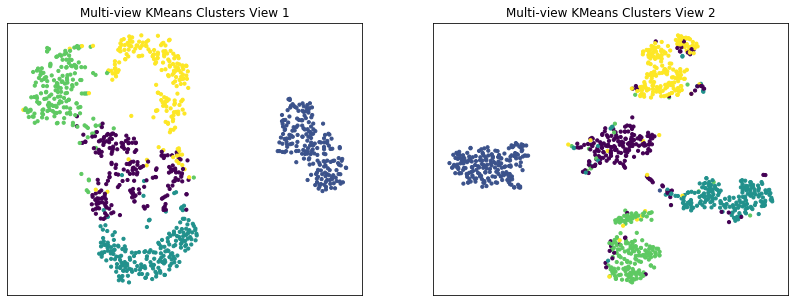

In [6]:
display_plots('True Labels', new_data, labels)
display_plots('Multi-view KMeans Clusters', new_data, m_clusters)

## Multi-view spherical KMeans clustering different parameters
Here we will again compare the performance of the Multi-view and Single-view versions of spherical kmeans clustering on data with 2 views. We will follow a similar procedure as before, but we will be using a different configuration of parameters for Multi-view Spherical KMeans Clustering. <br>

Again, we can see that Multi-view clustering produces clusters with slightly higher purity compared to those produced by clustering on just a single view or by clustering the two views concatenated together.

In [7]:
#################Single-view spherical kmeans clustering#####################
# Cluster each view separately
s_kmeans = SphericalKMeans(n_clusters=n_class, random_state=RANDOM_SEED)
s_clusters_v1 = s_kmeans.fit_predict(m_data[0])
s_clusters_v2 = s_kmeans.fit_predict(m_data[1])

# Concatenate the multiple views into a single view
s_data = np.hstack(m_data)
s_clusters = s_kmeans.fit_predict(s_data)

# Compute nmi between true class labels and single-view cluster labels
s_nmi_v1 = nmi_score(labels, s_clusters_v1)
s_nmi_v2 = nmi_score(labels, s_clusters_v2)
s_nmi = nmi_score(labels, s_clusters)
print('Single-view View 1 NMI Score: {0:.3f}\n'.format(s_nmi_v1))
print('Single-view View 2 NMI Score: {0:.3f}\n'.format(s_nmi_v2))
print('Single-view Concatenated NMI Score: {0:.3f}\n'.format(s_nmi))

#################Multi-view spherical kmeans clustering######################

# Use the MultiviewSphericalKMeans instance to cluster the data
m_kmeans = MultiviewSphericalKMeans(n_clusters=n_class,
        n_init=10, max_iter=6, patience=2, random_state=RANDOM_SEED)
m_clusters = m_kmeans.fit_predict(m_data)

# Compute nmi between true class labels and multi-view cluster labels
m_nmi = nmi_score(labels, m_clusters)
print('Multi-view NMI Score: {0:.3f}\n'.format(m_nmi))

Single-view View 1 NMI Score: 0.631

Single-view View 2 NMI Score: 0.730

Single-view Concatenated NMI Score: 0.730

Multi-view NMI Score: 0.684

